In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [21]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


### Creating a scatter plot to predict rise in sea levels Using line regression method from year 1880 and 2000:

Predicted sea level rise in 2050 (1880-2050): 10.18 inches
Predicted sea level rise in 2050 (2000-2050): 15.38 inches


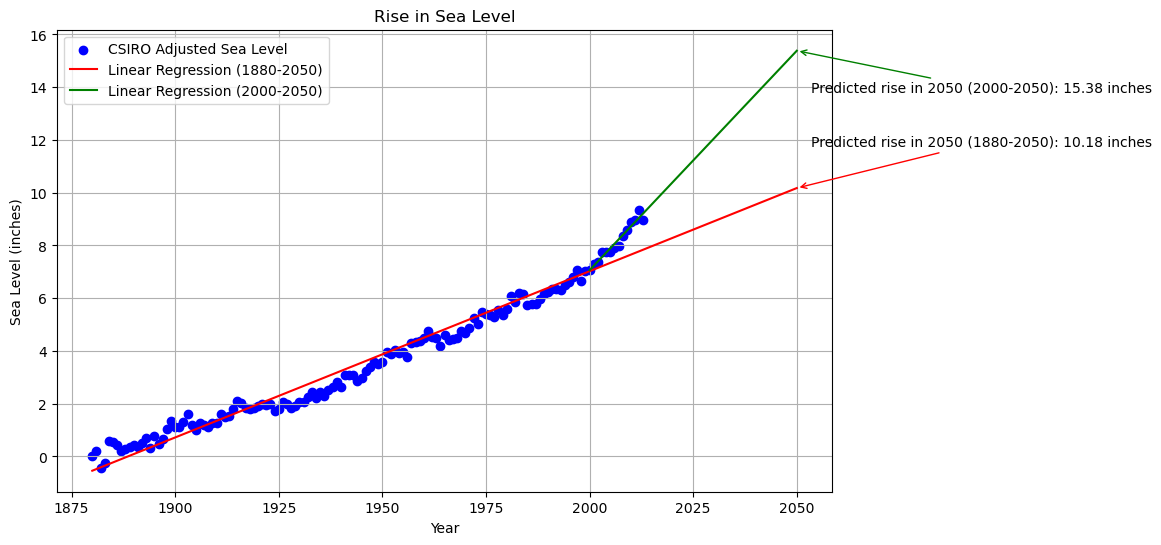

In [39]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="CSIRO Adjusted Sea Level", color="blue")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

# Linear regression from 1880 to 2050
slope_1880, intercept_1880, _, _, _ = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
x_1880 = np.arange(1880, 2051)
y_1880 = slope_1880 * x_1880 + intercept_1880
plt.plot(x_1880, y_1880, label="Linear Regression (1880-2050)", color="red")

# Linear regression from 2000 to 2050
slope_2000, intercept_2000, _, _, _ = linregress(df.loc[df["Year"] >= 2000, "Year"],
                                                 df.loc[df["Year"] >= 2000, "CSIRO Adjusted Sea Level"])
x_2000 = np.arange(2000, 2051)
y_2000 = slope_2000 * x_2000 + intercept_2000
plt.plot(x_2000, y_2000, label="Linear Regression (2000-2050)", color="green")

# Predicted sea level rise in 2050
predicted_sea_level_2050_1880 = slope_1880 * 2050 + intercept_1880
predicted_sea_level_2050_2000 = slope_2000 * 2050 + intercept_2000

# Annotate the predictions
plt.annotate(f"Predicted rise in 2050 (1880-2050): {predicted_sea_level_2050_1880:.2f} inches",
             xy=(2050, predicted_sea_level_2050_1880), xycoords="data",
             xytext=(10, 30), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="red"))
plt.annotate(f"Predicted rise in 2050 (2000-2050): {predicted_sea_level_2050_2000:.2f} inches",
             xy=(2050, predicted_sea_level_2050_2000), xycoords="data",
             xytext=(10, -30), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="green"))

print(f"Predicted sea level rise in 2050 (1880-2050): {predicted_sea_level_2050_1880:.2f} inches")
print(f"Predicted sea level rise in 2050 (2000-2050): {predicted_sea_level_2050_2000:.2f} inches")

plt.legend()
plt.grid(True)
plt.show()